# Stage 2 ： EDA and Machine Learning 
****
+ Section1: EDA 
+ Section2: ML Model
****

# Section1: EDA

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df1 = pd.read_csv('~/Desktop/data.csv')

In [11]:
df1.head()

,Contact_Diversity,Contact_Area_Diversity,Visiting_Area_Diversity,Roam_Ratio,Calling_Duration,Called_Duration,Transfered_Duration,Domestic_Duration,International_Duration,T1_Flux,...,T3_Flux,T4_Flux,T5_Flux,T6_Flux,T7_Flux,T8_Flux,T9_Flux,T10_Flux,T11_Flux,Response
0,142,15,1,0.000000,44299,30344,0,74643,0,1314.083604,...,0.0,480.057820,278.158104,307.056765,2116.355492,200.491428,2397.611697,63.755345,0.0,0
1,201,27,14,0.030841,31929,28958,0,60887,0,1071.357919,...,0.0,324.812896,172.202370,0.000000,304.250161,173.416031,2308.663998,8.639757,0.0,0
2,144,24,9,0.183239,48788,36111,152,85051,0,342.847324,...,0.0,340.416939,205.918565,0.000000,1509.974081,218.069456,982.919087,0.000000,0.0,0
3,64,15,6,0.266150,25217,13847,0,39064,0,515.709960,...,0.0,253.693858,392.137079,537.145316,1312.793795,313.872932,1414.516294,0.000000,0.0,0
4,37,7,1,0.000000,5769,6574,0,12343,0,287.886829,...,0.0,290.421814,23.582611,7.794229,121.901586,412.775853,1149.341331,0.000000,0.0,0


In [12]:
df1.describe()

,Contact_Diversity,Contact_Area_Diversity,Visiting_Area_Diversity,Roam_Ratio,Calling_Duration,Called_Duration,Transfered_Duration,Domestic_Duration,International_Duration,T1_Flux,...,T3_Flux,T4_Flux,T5_Flux,T6_Flux,T7_Flux,T8_Flux,T9_Flux,T10_Flux,T11_Flux,Response
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,174.009138,16.188717,3.763210,0.149669,37211.470401,35655.112435,96.596345,72948.368296,14.810886,927.551103,...,12.063846,741.379964,380.111372,372.998694,1456.009189,411.254898,1831.773772,21.415748,7.294859,0.029797
std,133.935185,11.248483,3.624181,0.289642,35362.505943,32903.018563,853.054931,64390.642363,224.903620,963.544389,...,101.033679,904.425268,472.564509,565.718830,1443.192185,574.328404,1788.111242,100.710655,87.786558,0.170062
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,8.000000,1.000000,0.000000,13592.000000,13349.000000,0.000000,29153.000000,0.000000,317.186821,...,0.000000,208.842501,64.523103,0.000000,371.021722,99.785106,647.831229,0.000000,0.000000,0.000000
50%,144.000000,14.000000,3.000000,0.012545,26766.000000,26024.000000,0.000000,55383.000000,0.000000,665.664994,...,0.000000,420.944115,225.356663,176.762553,1021.500173,230.940356,1323.708647,0.000000,0.000000,0.000000
75%,223.000000,22.000000,5.000000,0.103448,49367.000000,47442.000000,0.000000,99503.000000,0.000000,1239.943094,...,0.000000,896.266319,520.468193,518.401680,2139.957530,505.894425,2302.040781,0.000000,0.000000,0.000000
max,1352.000000,71.000000,30.000000,1.000000,331555.000000,302395.000000,25370.000000,591999.000000,7207.000000,9107.258435,...,2208.069091,7410.301704,3769.224471,6088.583777,10363.294340,6638.392712,14694.249580,1544.931129,3288.755996,1.000000


1.1 Plot Correlation map

In [13]:
def Correlation_Map (corr):
    name = corr.columns.tolist()
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(corr , cmap = plt.cm.Blues)
    fig.set_size_inches(11,11)
    ax.set_frame_on(False)
    ax.set_yticks(np.arange(corr.shape[0]+0.5))
    ax.set_xticks(np.arange(corr.shape[1]+0.5))
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels(name)
    ax.set_yticklabels(corr.index)
    plt.xticks(rotation=90)
    ax.grid(False)
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    plt.colorbar(heatmap)
    plt.show()

In [39]:
df1.corr()

,Phone,Contact_Diversity,Contact_Area_Diversity,Visiting_Area_Diversity,Roam_Ratio,Calling_Duration,Called_Duration,Transfered_Duration,Domestic_Duration,International_Duration,...,T3_Flux,T4_Flux,T5_Flux,T6_Flux,T7_Flux,T8_Flux,T9_Flux,T10_Flux,T11_Flux,Response
Phone,1.000000,-0.033784,-0.032243,0.010621,0.031745,0.014265,0.002952,0.014810,0.009500,0.011150,...,0.035636,0.034205,0.029909,0.044581,0.063400,0.036939,0.093214,0.035524,-0.005952,0.010570
Contact_Diversity,-0.033784,1.000000,0.570803,0.159775,-0.110995,0.584175,0.663100,0.077238,0.660704,-0.006107,...,-0.029670,0.094553,0.140876,0.190634,0.156338,0.086496,0.108262,0.012845,0.031109,-0.023656
Contact_Area_Diversity,-0.032243,0.570803,1.000000,0.283941,0.129282,0.385166,0.427366,0.029009,0.430174,0.034139,...,-0.037313,0.098527,0.102005,0.207228,0.162451,0.092351,0.079542,0.042391,0.010249,0.008695
Visiting_Area_Diversity,0.010621,0.159775,0.283941,1.000000,0.236774,0.287585,0.265699,0.038770,0.293847,0.107191,...,-0.014347,0.025661,0.034400,0.046131,0.035112,0.031500,-0.012709,0.029969,0.065601,-0.054969
Roam_Ratio,0.031745,-0.110995,0.129282,0.236774,1.000000,-0.023993,-0.037837,0.041007,-0.032045,0.022016,...,-0.023092,-0.104103,-0.044603,-0.030688,-0.056730,-0.060724,-0.136619,0.011601,-0.008089,0.013064
Calling_Duration,0.014265,0.584175,0.385166,0.287585,-0.023993,1.000000,0.775617,0.079067,0.946314,0.072764,...,-0.007110,0.094755,0.131425,0.133387,0.114249,0.081354,0.103427,0.014788,0.016837,-0.019459
Called_Duration,0.002952,0.663100,0.427366,0.265699,-0.037837,0.775617,1.000000,0.074590,0.937831,0.030699,...,-0.017562,0.092439,0.109787,0.144568,0.120585,0.083215,0.097839,0.004759,0.011746,-0.008788
Transfered_Duration,0.014810,0.077238,0.029009,0.038770,0.041007,0.079067,0.074590,1.000000,0.094809,-0.006738,...,0.000045,-0.008442,0.001075,-0.008533,-0.005716,-0.022551,-0.005768,0.019446,-0.007306,-0.008207
Domestic_Duration,0.009500,0.660704,0.430174,0.293847,-0.032045,0.946314,0.937831,0.094809,1.000000,0.052066,...,-0.012851,0.099133,0.128299,0.147042,0.124213,0.086851,0.106692,0.010800,0.015171,-0.015364
International_Duration,0.011150,-0.006107,0.034139,0.107191,0.022016,0.072764,0.030699,-0.006738,0.052066,1.000000,...,-0.007752,0.008060,-0.002131,-0.008150,0.021054,0.014712,0.007815,0.003181,-0.005470,0.022406


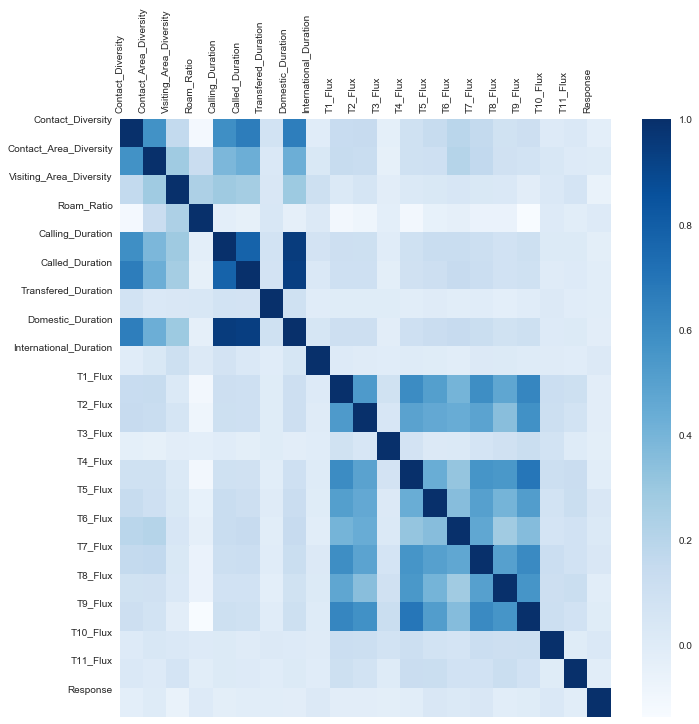

In [14]:
Correlation_Map(df1.corr())

In [22]:
sns.set(style="white")

1.2 Label distribution in pie plot and histogram

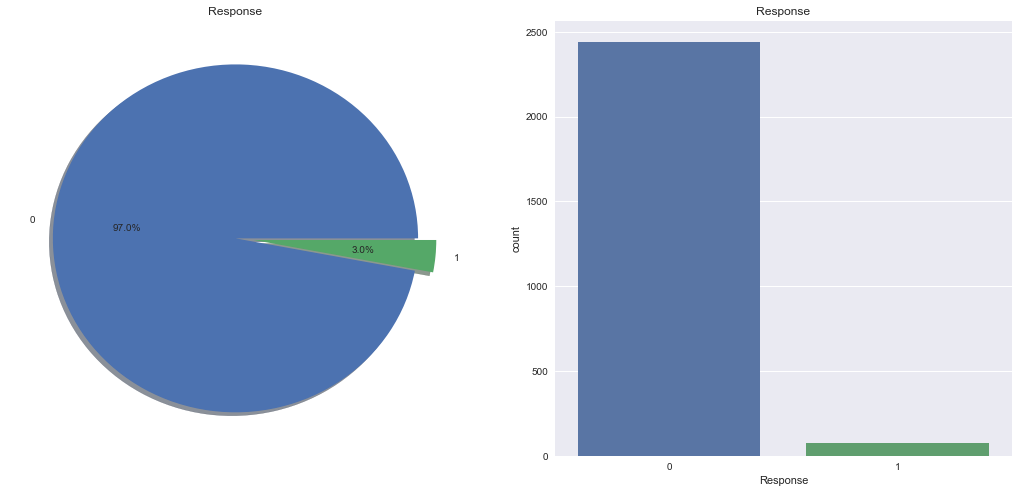

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['Response'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=df1,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In [16]:
dff1=df1[df1['Response']==1]
dff0=df1[df1['Response']==0]
title = df1.columns.tolist()

1.3 Feature distributions in bar plot

In [17]:
def box_plot(column):
    data=[dff1.iloc[:,column],dff0.iloc[:,column]]
    fig,ax=plt.subplots()
    ax.boxplot(data, vert=False)
    ax.set_yticklabels(['Defaults','Repayment'])
    ax.set_title(title[column])
    plt.show()

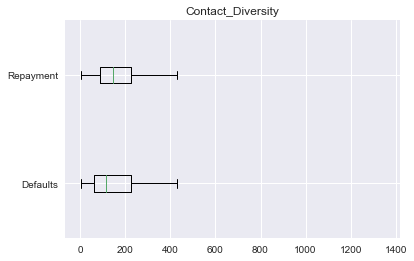

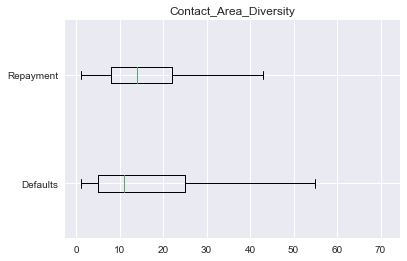

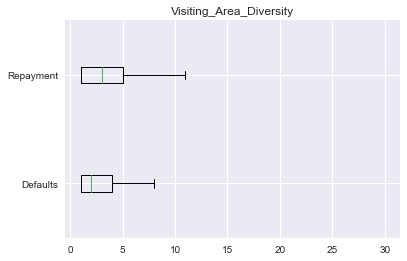

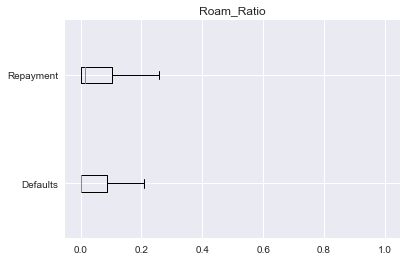

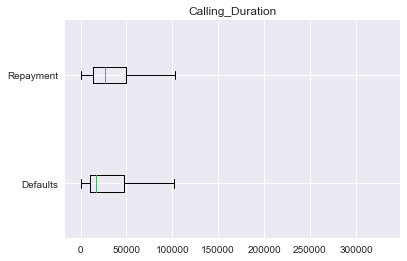

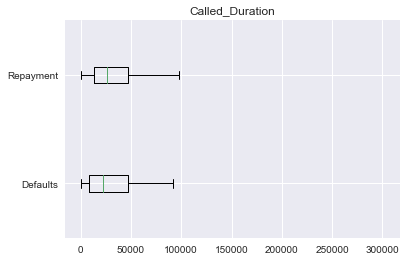

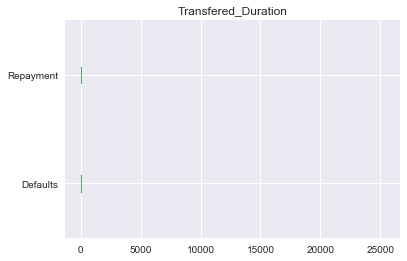

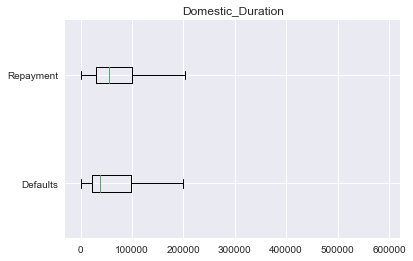

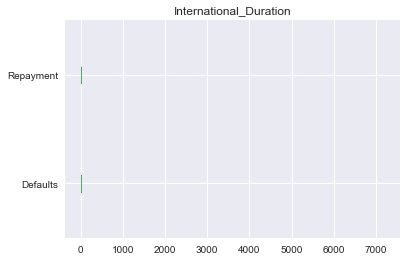

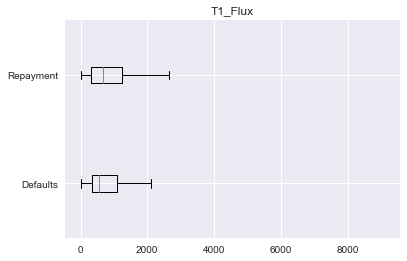

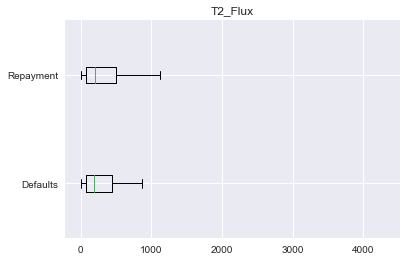

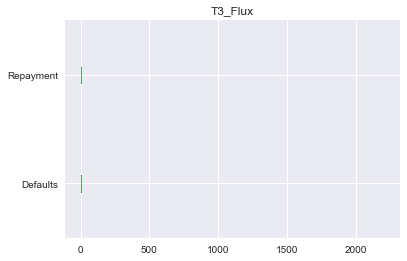

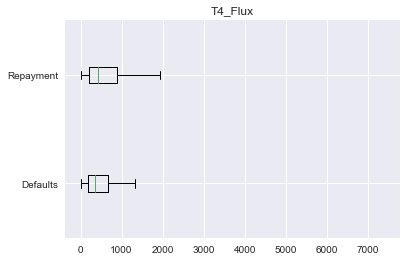

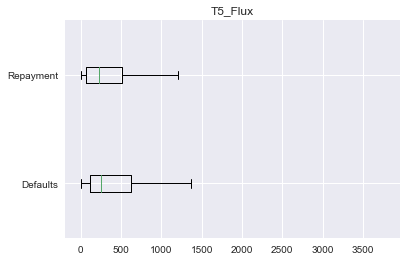

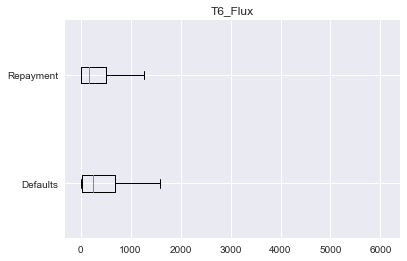

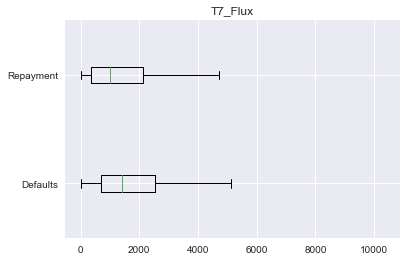

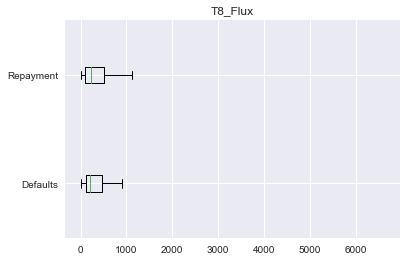

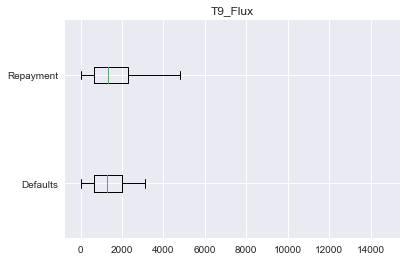

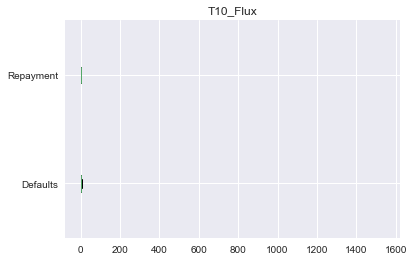

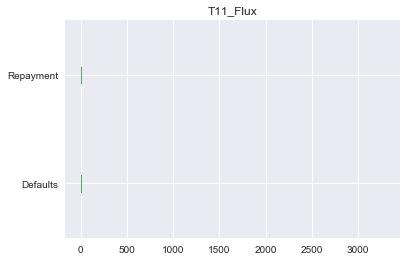

In [18]:
for i in range(len(df1.columns)-1):
    box_plot(i)

1.3 Feature distributions in violin plot

In [20]:
def violin_plot(column):
    data=[dff1.iloc[:,column],dff0.iloc[:,column]]
    fig,ax=plt.subplots()
    ax.violinplot(data, [1,2], points=50, vert=False, widths=1.1,showextrema=True)
    ax.set_yticklabels(['','','Defaults','','Repayment'])
    ax.set_title(title[column])
    plt.show()

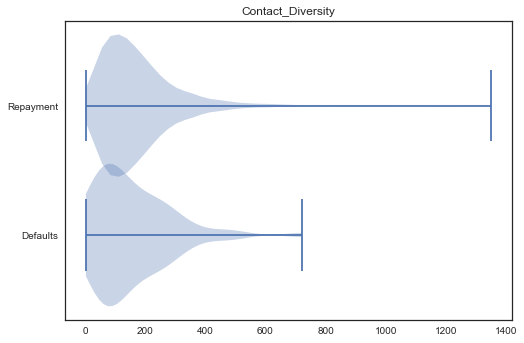

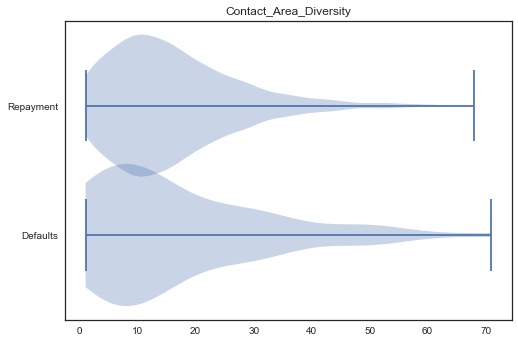

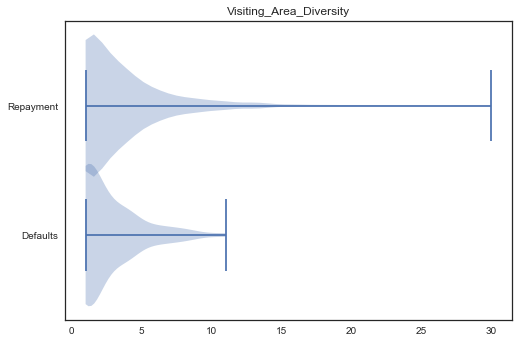

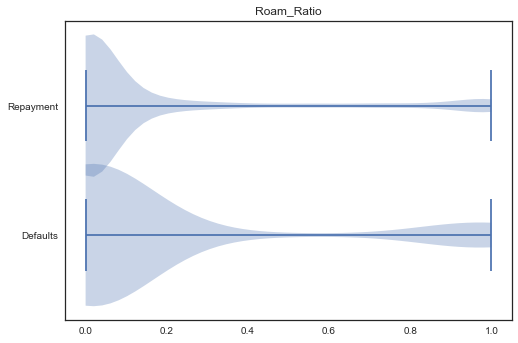

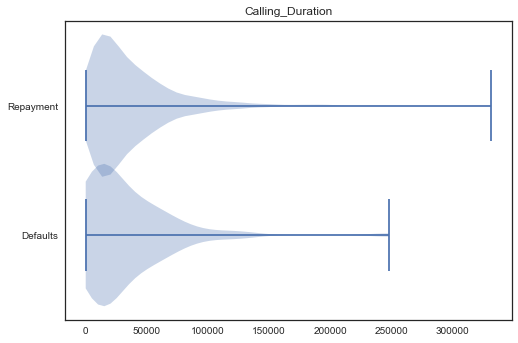

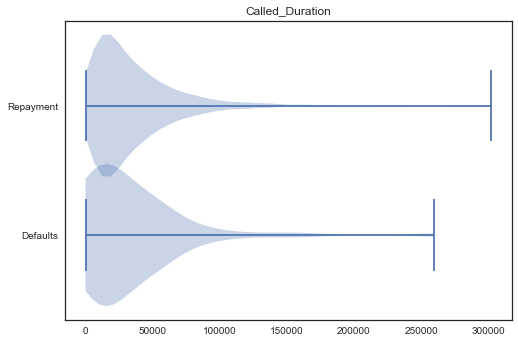

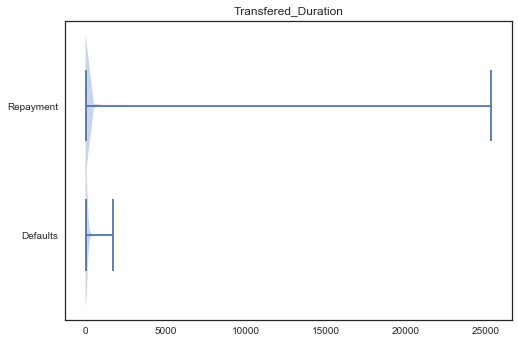

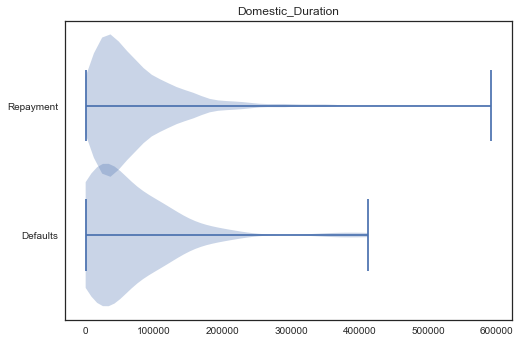

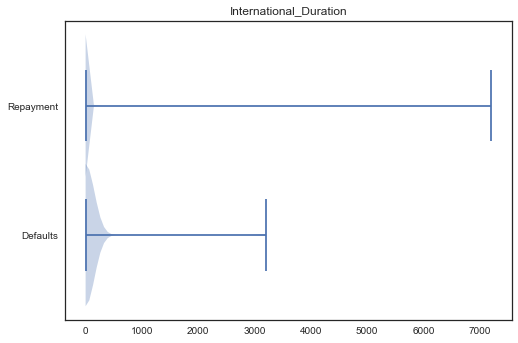

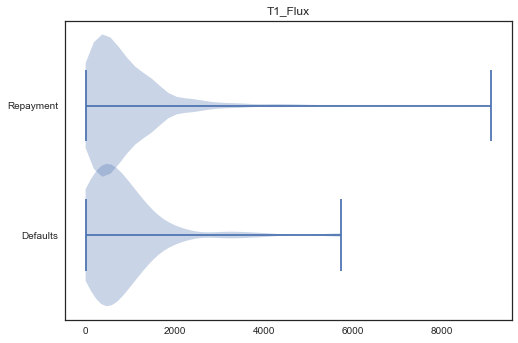

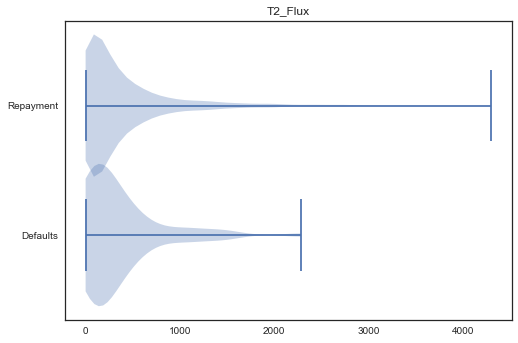

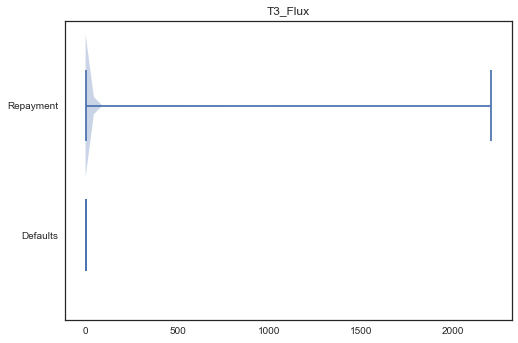

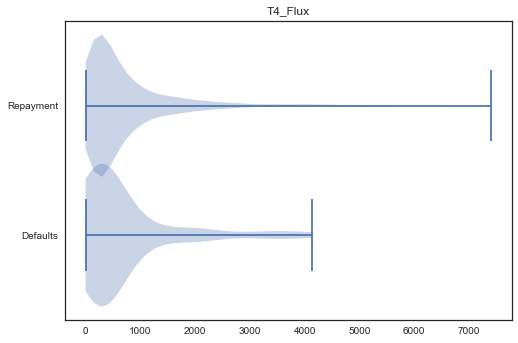

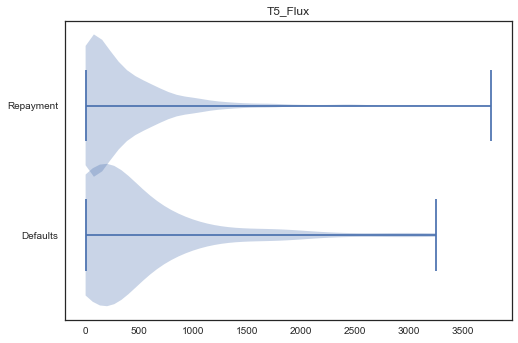

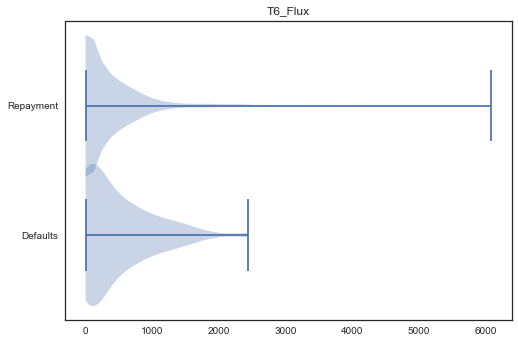

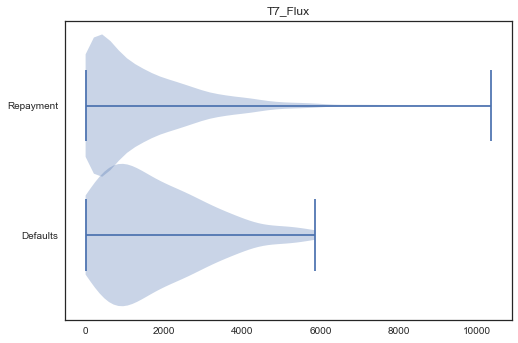

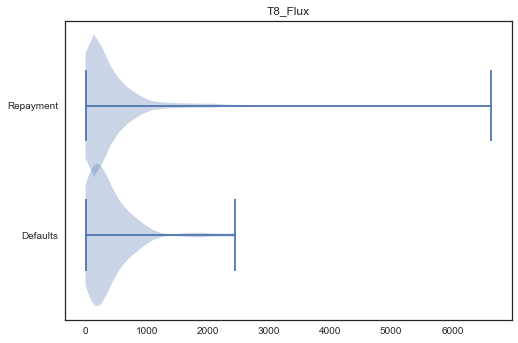

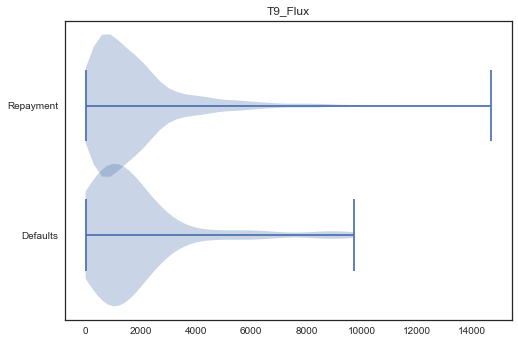

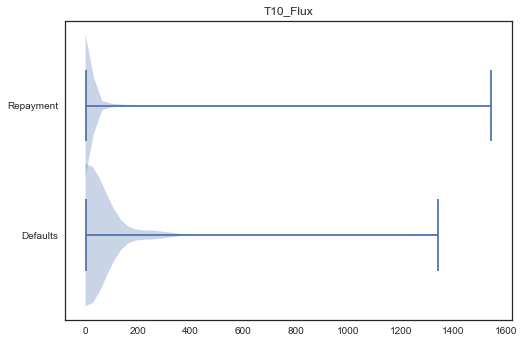

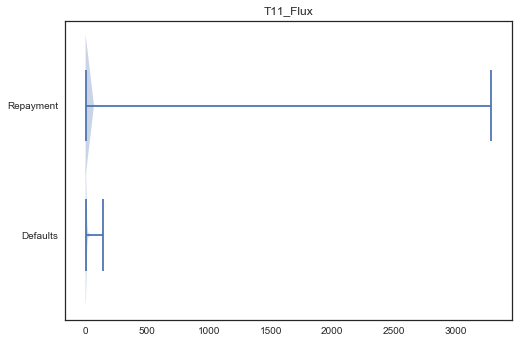

In [23]:
for i in range(len(df1.columns)-1):
    violin_plot(i)

1.4 Comparison of median number between two classes by bar plot 

In [25]:
for i in range(len(df1.columns)-1):
    data=[dff1.iloc[:,i],dff0.iloc[:,i]]
    print('Median number of', title[i],':','Default',data[0].median(),'Repayment',data[1].median())

Median number of Contact_Diversity : Default 115.0 Repayment 144.0
Median number of Contact_Area_Diversity : Default 11.0 Repayment 14.0
Median number of Visiting_Area_Diversity : Default 2.0 Repayment 3.0
Median number of Roam_Ratio : Default 0.0 Repayment 0.013060428999999998
Median number of Calling_Duration : Default 16965.0 Repayment 26951.0
Median number of Called_Duration : Default 22638.0 Repayment 26230.0
Median number of Transfered_Duration : Default 0.0 Repayment 0.0
Median number of Domestic_Duration : Default 38701.0 Repayment 55856.0
Median number of International_Duration : Default 0.0 Repayment 0.0
Median number of T1_Flux : Default 551.8013392999999 Repayment 669.62281145
Median number of T2_Flux : Default 194.8454949 Repayment 204.31488105
Median number of T3_Flux : Default 0.0 Repayment 0.0
Median number of T4_Flux : Default 349.2627875 Repayment 426.7267517
Median number of T5_Flux : Default 252.7785592 Repayment 225.2722012
Median number of T6_Flux : Default 252.74

In [31]:
default_median = []
repayment_median = []
for i in range(len(df1.columns)-1):
    default_median.append(dff1.iloc[:,i].median())
    repayment_median.append(dff0.iloc[:,i].median())

In [32]:
def median_bar_plot(s,e):
    xtitle = df1.columns[s:e].tolist()
    fig, ax = plt.subplots(figsize =(8,8))
    index = np.arange(e-s)
    bar_width = 0.35
    
    rects1 = plt.bar(index, default_median[s:e], bar_width,
                 alpha=0.4,
                 color='b',              
                 label='Default')

    rects2 = plt.bar(index + bar_width, repayment_median[s:e], bar_width,
                 alpha=0.4,
                 color='r',
                 label='Repayment')
    
    plt.xlabel('Group')
    plt.ylabel('Median Scores')
    plt.title('Median Scores by defaults and repayment')
    plt.xticks(index + bar_width / 2, (xtitle), rotation =90)
    plt.legend()
    plt.tight_layout()
    plt.show()

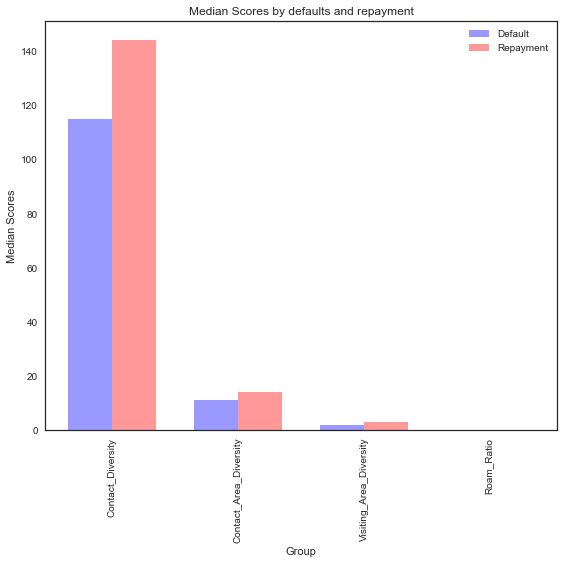

In [34]:
median_bar_plot(0,4)

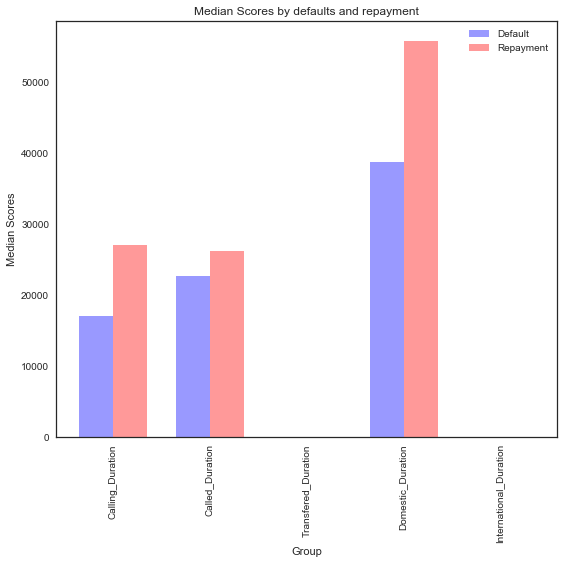

In [35]:
median_bar_plot(4,9)

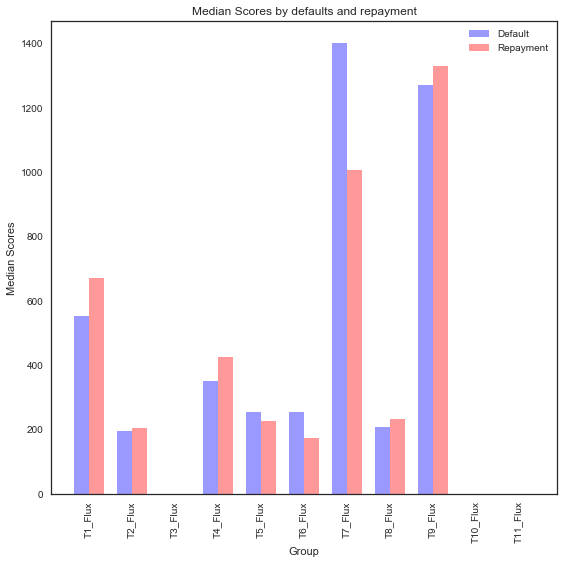

In [36]:
median_bar_plot(9,20)

1.5 Comparison of max number between two classes by bar plot 

In [26]:
for i in range(len(df1.columns)-1):
    data=[dff1.iloc[:,i],dff0.iloc[:,i]]
    print('Max number of', title[i],':','Default',data[0].max(),'Repayment',data[1].max())

Max number of Contact_Diversity : Default 721 Repayment 1352
Max number of Contact_Area_Diversity : Default 71 Repayment 68
Max number of Visiting_Area_Diversity : Default 11 Repayment 30
Max number of Roam_Ratio : Default 1.0 Repayment 1.0
Max number of Calling_Duration : Default 247810 Repayment 331555
Max number of Called_Duration : Default 259603 Repayment 302395
Max number of Transfered_Duration : Default 1704 Repayment 25370
Max number of Domestic_Duration : Default 412018 Repayment 591999
Max number of International_Duration : Default 3207 Repayment 7207
Max number of T1_Flux : Default 5723.250997 Repayment 9107.258435
Max number of T2_Flux : Default 2284.256825 Repayment 4305.020957
Max number of T3_Flux : Default 0.0 Repayment 2208.069091
Max number of T4_Flux : Default 4138.685255 Repayment 7410.301704
Max number of T5_Flux : Default 3255.072558 Repayment 3769.224471
Max number of T6_Flux : Default 2434.253589 Repayment 6088.583777
Max number of T7_Flux : Default 5854.597502 

In [37]:
default_max = []
repayment_max = []
for i in range(len(df1.columns)-1):
    default_max.append(dff1.iloc[:,i].max())
    repayment_max.append(dff0.iloc[:,i].max())

In [38]:
def max_bar_plot(s,e):
    xtitle = df1.columns[s:e].tolist()
    fig, ax = plt.subplots(figsize =(8,8))
    index = np.arange(e-s)
    bar_width = 0.35
    
    rects1 = plt.bar(index, default_max[s:e], bar_width,
                 alpha=0.4,
                 color='b',              
                 label='Default')

    rects2 = plt.bar(index + bar_width, repayment_max[s:e], bar_width,
                 alpha=0.4,
                 color='r',
                 label='Repayment')
    
    plt.xlabel('Group')
    plt.ylabel('Max Scores')
    plt.title('Max Scores by defaults and repayment')
    plt.xticks(index + bar_width / 2, (xtitle), rotation =90)
    plt.legend()
    plt.tight_layout()
    plt.show()

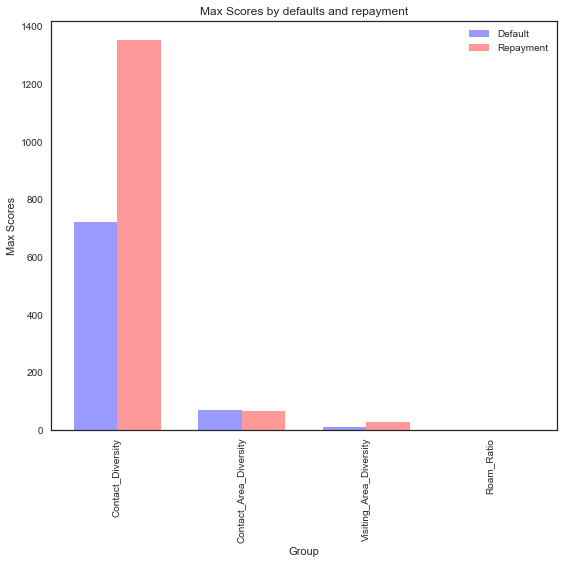

In [39]:
max_bar_plot(0,4)

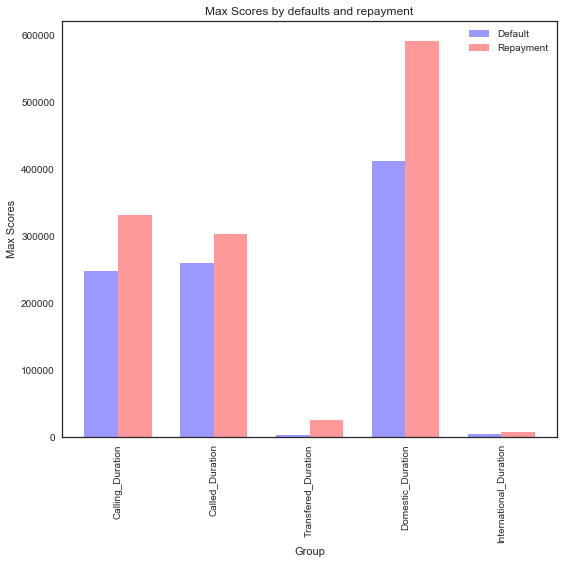

In [40]:
max_bar_plot(4,9)

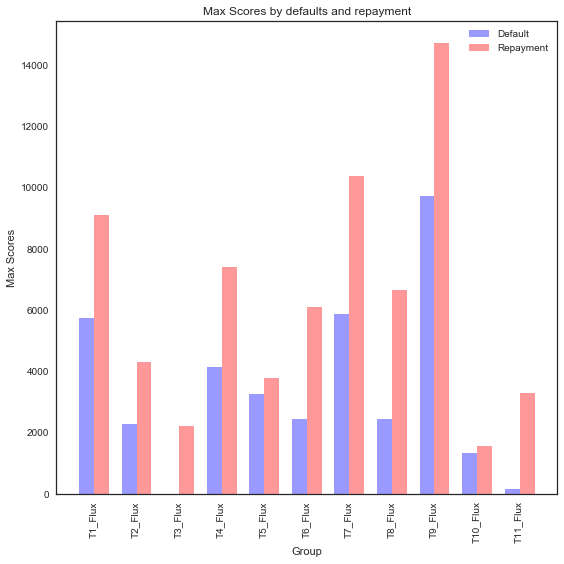

In [41]:
max_bar_plot(9,20)

1.6 Test statistics for the difference of median number between two classes 

In [28]:
from scipy.stats import median_test
def median_statistics(column):
    data=[dff1.iloc[:,column],dff0.iloc[:,column]]
    stat, p, med, tbl = median_test(data[0],data[1])
    print (title[i],'median-statistic is', stat,',' ' p-value is', p/2)

In [29]:
for i in range(len(df1.columns)-1):
    median_statistics(i)

Contact_Diversity median-statistic is 1.13229103655 , p-value is 0.14364359189
Contact_Area_Diversity median-statistic is 1.77198825308 , p-value is 0.091568104181
Visiting_Area_Diversity median-statistic is 2.64294541226 , p-value is 0.0520052747668
Roam_Ratio median-statistic is 3.47896815947 , p-value is 0.0310767418796
Calling_Duration median-statistic is 1.36610578377 , p-value is 0.121241046195
Called_Duration median-statistic is 0.489840289186 , p-value is 0.241999278213
Transfered_Duration median-statistic is 0.315891740176 , p-value is 0.287043541121
Domestic_Duration median-statistic is 0.873001692828 , p-value is 0.175062825709
International_Duration median-statistic is 0.117191223386 , p-value is 0.366050514287
T1_Flux median-statistic is 0.489840289186 , p-value is 0.241999278213
T2_Flux median-statistic is 1.22020403498e-05 , p-value is 0.498606440838
T3_Flux median-statistic is 1.61576099144 , p-value is 0.101841935655
T4_Flux median-statistic is 1.969152562 , p-value is

# Section2: Machine Learning

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/Users/zuochaozhao/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#Define training and test data set

In [43]:
y = np.array(df1['Response'])

In [45]:
df1.drop(['Response'], axis=1, inplace=True)
df1.drop(['International_Duration','T3_Flux'], axis=1, inplace=True)

In [48]:
X = np.array(df1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)

In [57]:
#Random Forest
model=RandomForestClassifier(n_estimators=200, max_depth=5, max_features=0.3)
kfolder=StratifiedKFold(y_train, n_folds=4, shuffle=True, random_state=1)
grand_auc =0.0
i = 0
grand_accuracy =0.0
for train_index, test_index in kfolder:
    X_trained, X_cv = X_train[train_index], X_train[test_index]
    y_trained, y_cv = y_train[train_index], y_train[test_index]
    model.fit(X_trained, y_trained)
    preds = model.predict_proba(X_cv)[:,1]
    pred = model.predict(X_cv)
    auc=roc_auc_score(y_cv,preds)
    accuracy=accuracy_score(y_cv, pred)
    print('fold %d/%d auc %f' %(i+1,4,auc))
    print('fold %d/%d accuracy %f' %(i+1,4,accuracy))
    grand_auc +=auc
    grand_accuracy +=accuracy
    i +=1
    
grand_auc /=4.0
print('grand AUC is %f' %(grand_auc))
grand_accuracy /=4.0
print('grand accuracy is %f' %(grand_accuracy))

fold 1/4 auc 0.577506
fold 1/4 accuracy 0.972789
fold 2/4 auc 0.602370
fold 2/4 accuracy 0.972789
fold 3/4 auc 0.738080
fold 3/4 accuracy 0.975000
fold 4/4 auc 0.651869
fold 4/4 accuracy 0.974943
grand AUC is 0.642456
grand accuracy is 0.973880


In [60]:
model.fit(X_train,y_train)
preds_rf_train = model.predict_proba(X_train)[:,1]
preds_rf_test = model.predict_proba(X_test)[:,1]

In [68]:
#Logistic Regression
model=LogisticRegression(C=10)
kfolder=StratifiedKFold(y_train, n_folds=4, shuffle=True, random_state=1)
grand_auc =0.0
i = 0
grand_accuracy =0.0
for train_index, test_index in kfolder:
    X_trained, X_cv = X_train[train_index], X_train[test_index]
    y_trained, y_cv = y_train[train_index], y_train[test_index]
    model.fit(X_trained, y_trained)
    preds = model.predict_proba(X_cv)[:,1]
    pred = model.predict(X_cv)
    auc=roc_auc_score(y_cv,preds)
    accuracy=accuracy_score(y_cv, pred)
    print('fold %d/%d auc %f' %(i+1,4,auc))
    print('fold %d/%d accuracy %f' %(i+1,4,accuracy))
    grand_auc +=auc
    grand_accuracy +=accuracy
    i +=1
    
grand_auc /=4.0
print('grand AUC is %f' %(grand_auc))
grand_accuracy /=4.0
print('grand accuracy is %f' %(grand_accuracy))

fold 1/4 auc 0.743590
fold 1/4 accuracy 0.972789
fold 2/4 auc 0.543901
fold 2/4 accuracy 0.965986
fold 3/4 auc 0.611570
fold 3/4 accuracy 0.977273
fold 4/4 auc 0.512957
fold 4/4 accuracy 0.974943
grand AUC is 0.603004
grand accuracy is 0.972748


In [69]:
model.fit(X_train,y_train)
preds_lr_train = model.predict_proba(X_train)[:,1]
preds_lr_test = model.predict_proba(X_test)[:,1]

In [71]:
#Gradient Boosting
model=xgb.XGBClassifier(learning_rate = 0.01, n_estimators= 500, colsample_bytree=0.8)
kfolder=StratifiedKFold(y_train, n_folds=4, shuffle=True, random_state=1)
grand_auc =0.0
i = 0
grand_accuracy =0.0
for train_index, test_index in kfolder:
    X_trained, X_cv = X_train[train_index], X_train[test_index]
    y_trained, y_cv = y_train[train_index], y_train[test_index]
    model.fit(X_trained, y_trained)
    preds = model.predict_proba(X_cv)[:,1]
    pred = model.predict(X_cv)
    auc=roc_auc_score(y_cv,preds)
    accuracy=accuracy_score(y_cv, pred)
    print('fold %d/%d auc %f' %(i+1,4,auc))
    print('fold %d/%d accuracy %f' %(i+1,4,accuracy))
    grand_auc +=auc
    grand_accuracy +=accuracy
    i +=1
    
grand_auc /=4.0
print('grand AUC is %f' %(grand_auc))
grand_accuracy /=4.0
print('grand accuracy is %f' %(grand_accuracy))

fold 1/4 auc 0.535936
fold 1/4 accuracy 0.972789
fold 2/4 auc 0.670357
fold 2/4 accuracy 0.972789
fold 3/4 auc 0.686586
fold 3/4 accuracy 0.975000
fold 4/4 auc 0.752336
fold 4/4 accuracy 0.974943
grand AUC is 0.661304
grand accuracy is 0.973880


In [ ]:
#Stack 
#First layer : logitistic and random forest
#Second layer : xgb

In [72]:
x_train = np.stack((preds_lr_train, preds_rf_train), axis=-1)

In [74]:
x_test = np.stack((preds_lr_test, preds_rf_test), axis=-1)

In [75]:
gbm = xgb.XGBClassifier(learning_rate = 0.01, n_estimators= 500, colsample_bytree=0.8).fit(x_train, y_train)
predictions = gbm.predict_proba(x_test)[:,1]
auc=roc_auc_score(y_test,predictions)
print('auc is %f' %(auc))

auc is 0.557701


In [ ]:
#h2o auto ML

In [89]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
train = h2o.import_file("~/Desktop/train.csv")
test = h2o.import_file("~/Desktop/test.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 58 mins
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,"14 days, 22 hours and 10 minutes"
H2O cluster name:,H2O_from_python_zuochaozhao_axd4hq
H2O cluster total nodes:,1
H2O cluster free memory:,1.433 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [90]:
x = train.columns
y = "Response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()


# Run AutoML for 30 seconds
aml = H2OAutoML(max_runtime_secs = 1000)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = test)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

#  model_id                                                    auc    logloss
#  ----------------------------------------------------   --------  ---------
#  StackedEnsemble_AllModels_0_AutoML_20171121_010846     0.786063   0.555833
#  StackedEnsemble_BestOfFamily_0_AutoML_20171121_010846  0.783367   0.558511
#  GBM_grid_0_AutoML_20171121_010846_model_1              0.779242   0.562157
#  GBM_grid_0_AutoML_20171121_010846_model_0              0.778855   0.562648
#  GBM_grid_0_AutoML_20171121_010846_model_3              0.769666   0.572165
#  GBM_grid_0_AutoML_20171121_010846_model_2              0.769147   0.572064
#  XRT_0_AutoML_20171121_010846                           0.744612   0.593885
#  DRF_0_AutoML_20171121_010846                           0.733039   0.608609
#  GLM_grid_0_AutoML_20171121_010846_model_0              0.685211   0.635138

#  [9 rows x 3 columns]

# The leader model is stored here
aml.leader


# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [92]:
lb

model_id,auc,logloss
DRF_0_AutoML_20180412_231206,0.626913,0.702193
GBM_grid_0_AutoML_20180412_231206_model_7,0.611612,1.96838
StackedEnsemble_BestOfFamily_0_AutoML_20180412_231206,0.603256,0.161749
GLM_grid_0_AutoML_20180412_231206_model_0,0.603256,0.166364
DeepLearning_0_AutoML_20180412_231206,0.587032,0.177345
GBM_grid_0_AutoML_20180412_231206_model_11,0.57401,0.161356
StackedEnsemble_AllModels_0_AutoML_20180412_231206,0.558492,0.161909
GBM_grid_0_AutoML_20180412_231206_model_8,0.554042,0.195351
GBM_grid_0_AutoML_20180412_231206_model_4,0.550787,0.174538
GBM_grid_0_AutoML_20180412_231206_model_13,0.546392,0.178196


In [93]:
aml.leader

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_0_AutoML_20180412_231206


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03863165664228788
RMSE: 0.19654937456600538
LogLoss: 0.9000481027935825
Mean Per-Class Error: 0.43347810351067684
AUC: 0.5608975750995295
Gini: 0.12179515019905907
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11111108462015784: 


,0,1,Error,Rate
0,1364.0,171.0,0.1114,(171.0/1535.0)
1,34.0,11.0,0.7556,(34.0/45.0)
Total,1398.0,182.0,0.1297,(205.0/1580.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1111111,0.0969163,12.0
max f2,0.1111111,0.1519337,12.0
max f0point5,1.0,0.0724638,0.0
max accuracy,1.0,0.9689873,0.0
max precision,1.0,0.1666667,0.0
max recall,0.0,1.0,13.0
max specificity,1.0,0.9967427,0.0
max absolute_mcc,0.1111111,0.0693212,12.0
max min_per_class_accuracy,0.1111111,0.2444444,12.0
max mean_per_class_accuracy,0.1111111,0.5665219,12.0


Gains/Lift Table: Avg response rate:  2.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0161893,0.5,1.3428094,1.3428094,0.0384615,0.0384615,0.0217391,0.0217391,34.2809365,34.2809365
,2,0.0485679,0.3333333,0.6714047,0.8952062,0.0192308,0.0256410,0.0217391,0.0434783,-32.8595318,-10.4793757
,3,0.0772105,0.25,1.5179584,1.1262272,0.0434783,0.0322581,0.0434783,0.0869565,51.7958412,12.6227209
,4,0.1027397,0.2000000,2.5546129,1.4811594,0.0731707,0.0424242,0.0652174,0.1521739,155.4612937,48.1159420
,5,1.0,0.0,0.9449054,1.0,0.0270645,0.0286426,0.8478261,1.0,-5.5094590,0.0




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.02627627627627628
RMSE: 0.1620995875265458
LogLoss: 0.48035030734777334
Mean Per-Class Error: 0.3494962216624685
AUC: 0.6473551637279596
Gini: 0.2947103274559193
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11111111111111116: 


,0,1,Error,Rate
0,318.0,79.0,0.199,(79.0/397.0)
1,5.0,5.0,0.5,(5.0/10.0)
Total,323.0,84.0,0.2064,(84.0/407.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1111111,0.1063830,2.0
max f2,0.1111111,0.2016129,2.0
max f0point5,0.1111111,0.0722543,2.0
max accuracy,0.3333333,0.9656020,0.0
max precision,0.1111111,0.0595238,2.0
max recall,0.0,1.0,4.0
max specificity,0.3333333,0.9899244,0.0
max absolute_mcc,0.1111111,0.1151415,2.0
max min_per_class_accuracy,0.1111111,0.5,2.0
max mean_per_class_accuracy,0.1111111,0.6505038,2.0


Gains/Lift Table: Avg response rate:  2.46 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0491400,0.2222222,2.035,2.035,0.05,0.05,0.1,0.1,103.5000000,103.5000000
,2,0.2063882,0.1111111,2.54375,2.4226190,0.0625,0.0595238,0.4,0.5,154.3750000,142.2619048
,3,1.0,0.0,0.6300310,1.0,0.0154799,0.0245700,0.5,1.0,-36.9969040,0.0




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.03237162209591445
RMSE: 0.17992115522059782
LogLoss: 0.7639326486896936
Mean Per-Class Error: 0.4824554069119287
AUC: 0.5104933110367893
Gini: 0.020986622073578598
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25: 


,0,1,Error,Rate
0,1513.0,47.0,0.0301,(47.0/1560.0)
1,43.0,3.0,0.9348,(43.0/46.0)
Total,1556.0,50.0,0.056,(90.0/1606.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.25,0.0625000,9.0
max f2,0.0,0.1284916,21.0
max f0point5,0.2597656,0.0746269,8.0
max accuracy,0.5,0.9707347,0.0
max precision,0.2597656,0.0909091,8.0
max recall,0.0,1.0,21.0
max specificity,0.5,0.9993590,0.0
max absolute_mcc,0.2597656,0.0439939,8.0
max min_per_class_accuracy,0.0909091,0.2826087,16.0
max mean_per_class_accuracy,0.25,0.5175446,9.0


Gains/Lift Table: Avg response rate:  2.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105853,0.2775253,2.0537084,2.0537084,0.0588235,0.0588235,0.0217391,0.0217391,105.3708440,105.3708440
,2,0.0311333,0.25,2.1159420,2.0947826,0.0606061,0.06,0.0434783,0.0652174,111.5942029,109.4782609
,3,0.0460772,0.2222222,0.0,1.4153937,0.0,0.0405405,0.0,0.0652174,-100.0,41.5393655
,4,0.0547945,0.1818182,2.4937888,1.5869565,0.0714286,0.0454545,0.0217391,0.0869565,149.3788820,58.6956522
,5,0.1220423,0.125,0.3232689,0.8906389,0.0092593,0.0255102,0.0217391,0.1086957,-67.6731079,-10.9361136
,6,0.2004981,0.1111111,1.1083506,0.9758304,0.0317460,0.0279503,0.0869565,0.1956522,10.8350587,-2.4169592
,7,1.0,0.0,1.0060612,1.0,0.0288162,0.0286426,0.8043478,1.0,0.6061222,0.0



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5295776,0.2967541,0.0279503,0.7009346,0.9127726,0.9781932,0.0280374
auc,0.5278061,0.0604174,0.4889954,0.5494506,0.4807074,0.6829114,0.4369658
err,0.4704224,0.2967541,0.9720497,0.2990654,0.0872274,0.0218069,0.9719626
err_count,151.2,95.42264,313.0,96.0,28.0,7.0,312.0
f0point5,0.0949139,0.0535631,0.0346955,0.0649351,0.1020408,0.2380952,0.0348028
f1,0.1100976,0.0438552,0.0543807,0.0943396,0.125,0.2222222,0.0545455
f2,0.1587572,0.0219393,0.1256983,0.1724138,0.1612903,0.2083333,0.1260504
lift_top_group,3.5392308,4.4461393,0.0,1.6461538,0.0,16.05,0.0
logloss,0.7639118,0.1769352,0.797331,0.9280359,0.9128482,0.2722377,0.9091065
max_per_class_error,0.8430769,0.1023742,1.0,0.6153846,0.8,0.8,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-04-12 23:12:07,1.105 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-04-12 23:12:07,1.113 sec,1.0,0.2930164,2.9654505,0.5655697,3.6750572,0.0858586,0.2377205,1.9518227,0.5323678,2.7133333,0.0565111
,2018-04-12 23:12:07,1.120 sec,2.0,0.2427032,1.8148796,0.5840196,4.6550725,0.0774336,0.2028664,0.9726509,0.5195214,1.6280000,0.0810811
,2018-04-12 23:12:07,1.161 sec,3.0,0.2250291,1.4302259,0.5711996,3.3250518,0.0785838,0.1787205,0.6401156,0.6073048,3.3916667,0.0982801
,2018-04-12 23:12:07,1.172 sec,4.0,0.2169069,1.2387773,0.5691467,1.9396135,0.0856061,0.1730454,0.6370885,0.5998741,0.0,0.1105651
,2018-04-12 23:12:07,1.192 sec,5.0,0.2157568,1.2431660,0.5584509,0.0,0.0909727,0.1691865,0.5564701,0.6410579,0.0,0.1203931
,2018-04-12 23:12:07,1.210 sec,6.0,0.2134927,1.1676765,0.5565247,2.0947826,0.1039307,0.1675346,0.5577331,0.6282116,0.0,0.1425061
,2018-04-12 23:12:07,1.221 sec,7.0,0.2064101,1.0339438,0.5609136,1.6238625,0.1126302,0.1635197,0.4774354,0.6726700,2.9071429,0.1597052
,2018-04-12 23:12:07,1.232 sec,8.0,0.1997732,0.9492196,0.5665718,1.1637681,0.1193363,0.1624315,0.4793555,0.6573048,2.7133333,0.1916462
,2018-04-12 23:12:07,1.246 sec,9.0,0.1965494,0.9000481,0.5608976,1.3428094,0.1297468,0.1620996,0.4803503,0.6473552,2.035,0.2063882


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Called_Duration,22.7665272,1.0,0.0896434
T7_Flux,20.8016472,0.9136943,0.0819067
T8_Flux,20.3871517,0.8954880,0.0802746
T6_Flux,19.7588310,0.8678895,0.0778006
Domestic_Duration,19.1566620,0.8414398,0.0754296
T9_Flux,17.7878418,0.7813156,0.0700398
Contact_Area_Diversity,17.7812481,0.7810259,0.0700138
T5_Flux,16.8876324,0.7417746,0.0664952
T2_Flux,15.2913303,0.6716584,0.0602098
Calling_Duration,13.1978283,0.5797032,0.0519666
